In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
dataframe = pd.read_csv(r"avocado.csv")
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
dataframe.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


AveragePrice
0.44    1
0.46    1
0.48    1
0.49    2
0.51    5
       ..
3.04    1
3.05    1
3.12    1
3.17    1
3.25    1
Length: 259, dtype: int64


<ipython-input-86-c5dee61d50f0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['AveragePrice'],1).hist()


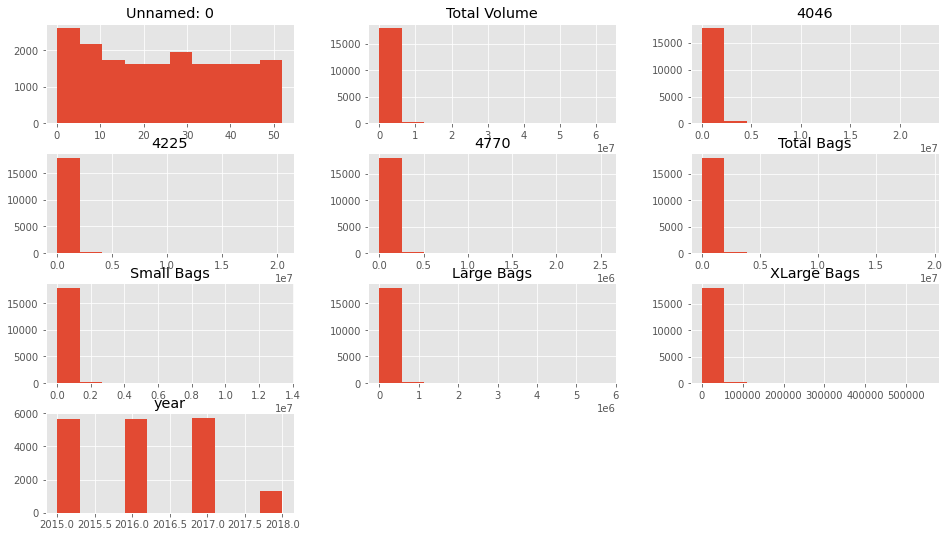

In [ ]:
print(dataframe.groupby('AveragePrice').size())
dataframe.drop(['AveragePrice'],1).hist()
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


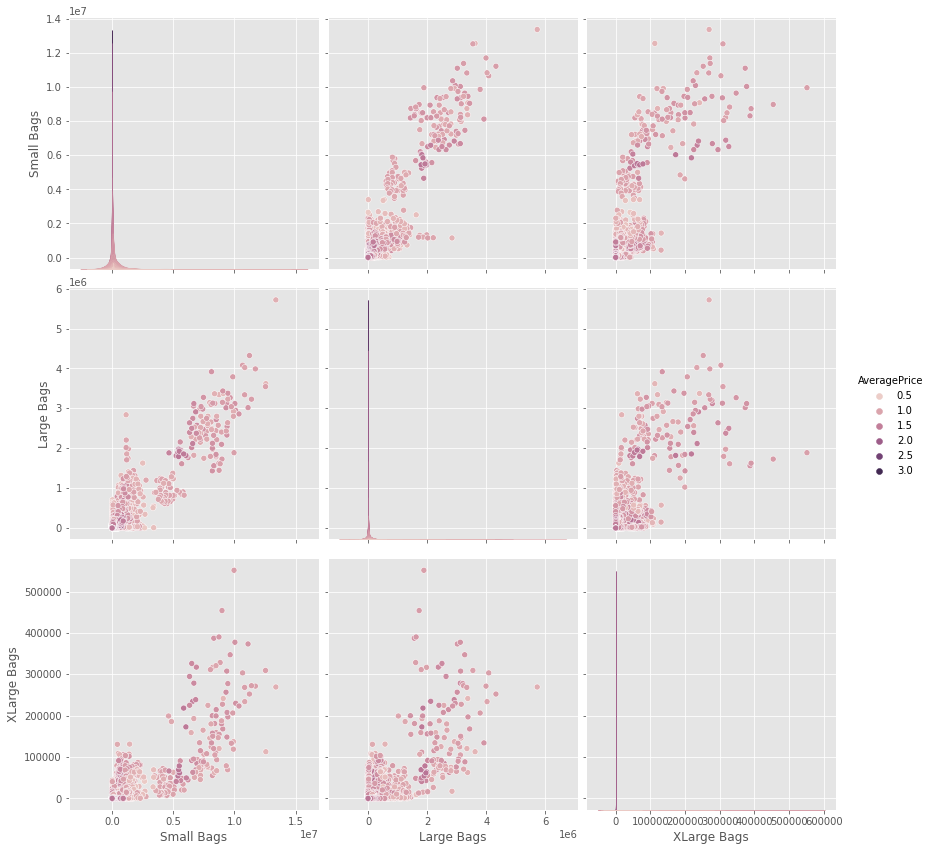

In [ ]:
sb.pairplot(dataframe.dropna(), hue='AveragePrice',size=4,vars=["Small Bags","Large Bags","XLarge Bags"],kind='scatter')

In [ ]:
X = np.array(dataframe[["Small Bags","Large Bags","XLarge Bags"]])
y = np.array(dataframe['AveragePrice'])
y=y.astype(int)
print(y)

[1 1 0 ... 1 1 1]


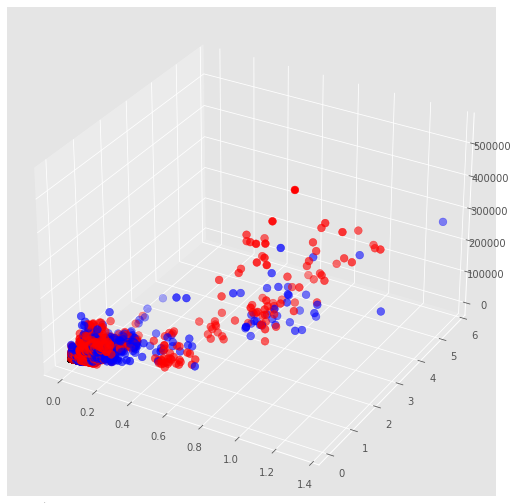

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ="3d")
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

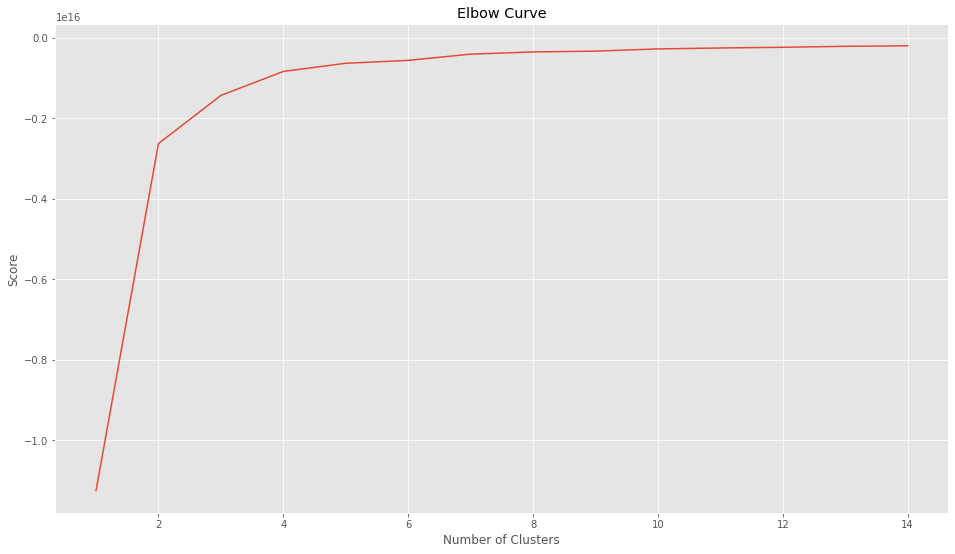

In [ ]:
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i, n_init="auto") for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.18842119e+05 3.56533947e+04 1.95282475e+03]
 [7.04172239e+06 2.07743166e+06 1.28013175e+05]]


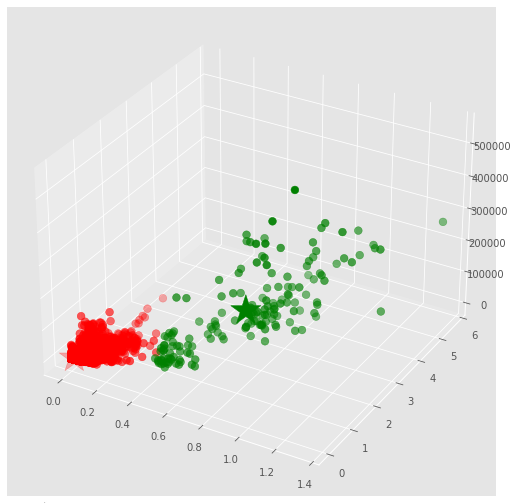

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = fig.add_subplot(111, projection ="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

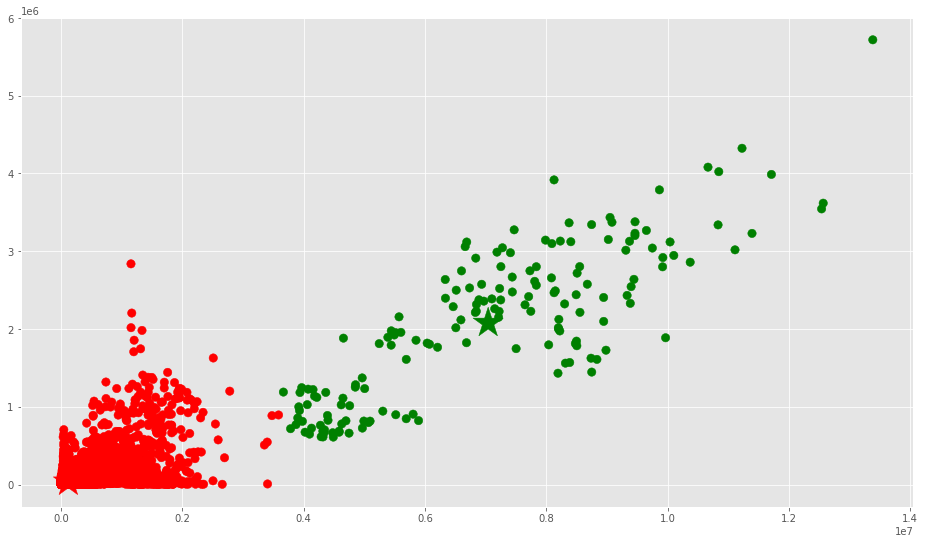

In [ ]:
# Getting the values and plotting it
f1 = dataframe['Small Bags'].values
f2 = dataframe['Large Bags'].values
f3 = dataframe['XLarge Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?




In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[6.14708475e+04 1.99462675e+04 8.69700393e+02]
 [7.71829243e+06 2.36568410e+06 1.50320373e+05]
 [1.21702265e+06 3.27200939e+05 2.12671056e+04]]


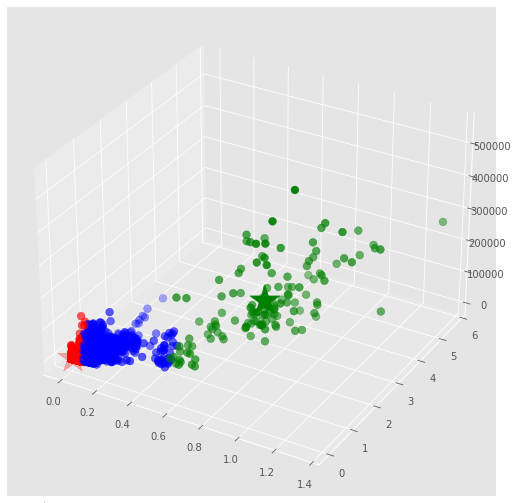

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green',"blue"]
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = fig.add_subplot(111, projection ="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Concluimos que estos centros sí son representativos ya que nos ayudan a visualizar mejor la dispersión de los datos. Si usamos dos centros, existen dos grupos que se diferencian perfectamente. Por otro lado, si usamos tres centros, existen tres grupos de datos que no pueden diferenciarse de manera simple. En conlusión es más adecuado separar nuestros datos en dos grupos para facilitar su interpretación.

¿Cómo obtuviste el valor de k a usar?
- Analizamos la "elbow curve" para detectar en que puntos se pueden observar cambios rádicales. Notamos que en el punto 2 se observa el cambio más grande, pasa de un cambio constante a un cambio suave.

¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?


- Significa que tendríamos datos atípicos que generarían una mayor cantidad de grupos.Por lo tanto, no se podrían visualizar de manera correcta la concentración de datos.

¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?


- Como explicamos anteriormente, los centros no serían más representativos si usaramos valores de "k" más altos. Con un valor de K=2, los centros se encuentran notoriamente separados entre sí (con una distancia de aproximadamente 0.7), lo que nos permite diferenciar los dos grupos con claridad.




¿Qué puedes decir de los datos basándose en los centros?

- Duran Sanchez Pablo Ricardo
 
En un analisis rapido podemos obseravr que los grupos rojo y verde cuentan con muy poca similitud, ya que sus centros son muy distantes. Los datos del grupo
verde, son mucho mas dispersos y su centro no se distingue tan intuitivamente. En cambio los datos del grupo rojo estan muy concentrados y su centro se puede localizar muy intuitivamente.

Karen Paula Mayorga Guerrero
¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
- Son representativos porque nos permiten visualizar cómo se dispersan los datos.

¿Cómo obtuviste el valor de k a usar?
- Se obtuvo gracias al método Elbow, el cual muestra la k optima a utilizar, en esta parte se decidió que el valor a usar sería 2 porque la pendiente cambia de una forma más significativa. 

¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
- En el caso de tener un valor alto significaría que se tendrían varios grupos similares (como se muestra en la gráfica de arriba con 3 centros en colores rojo azul y verde) por lo tanto estos grupos podrían no ser significativos. Por otro lado, si solo tuviéramos un solo centro no tendríamos una división de los datos en grupos significativos. 


¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?
- Uno de los centros está muy cercano al valor de 0.0 mientras que el otro está en 0.7. Por lo anterior, se tendría que existe una distancia aproximada 0.69.Y, dado que solo tenemos dos centros y no más centros para comparar contra que otras distancias, entonces no se podría afirmar con certeza si se encuentran cerca o lejos. 

¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

- Los centros estarían sesgados por la cantidad de datos atípicos. Por lo tanto, no se tendría una correcta visualización de la dispersión de los datos.

¿Qué puedes decir de los datos basándose en los centros?

- Que existe una concentración de datos en dos notables grupos, es decir que los datos se concentran en el grupo rojo o en el verde. 
